In [2]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [1]:
# Constraints by 2025:
# 50% of energy produced from renewable sources,
# > 2.5M zero emission vehicles (PEVs).


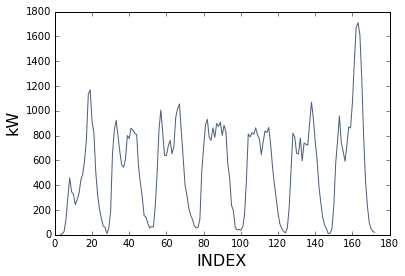

In [3]:
# 2025 Demand
# Today's demand * a0 - 15000 MW + EV demand
a0 = .8

#Today's demand:
today_demand = Table.read_table('data/March2016_CA_energy_demand.csv')
solar = Table.read_table('data/March2016_CA_gen_solar.csv')
wind = Table.read_table('data/March2016_CA_gen_wind.csv')

#EV demand:
EV_sim = Table.read_table('data/EV_charge_data.csv')
# week_kwh = np.sum(EV_sim['kW'])/2220
EV_sim.plot('INDEX', 'kW')



# 2025 demand
# today_demand['MW'] * a0 - 15000 + EV_month['kW']/1000

In [7]:
EV_sim['MW'] = EV_sim['kW']*2.5e6/2e3/1e3

In [11]:
def optimize(solar_scale, wind_scale):
    return np.mean((solar_scale*solar['MW'] + wind_scale*wind['MW']) - (.85*(today_demand['MW']-15000) + (.7*sum(EV_sim['MW']+ .3*sum(EV_sim['MW'])))**2))

minimize(optimize)
# array([ -2.75139708e+302,   2.58792896e+000])

array([ -2.75139708e+302,   2.58792896e+000])

In [8]:
EV_sim.append(EV_sim)

INDEX,hour,kW
3,3,0.927386
4,4,7.99758
5,5,26.8975
6,6,125.371
7,7,303.627
8,8,459.18
9,9,347.122
10,10,326.66
11,11,243.3
12,12,282.952


In [45]:
today_demand
# # EV_sim
# import numpy as np
# night = EV_sim.where(np.logical_or((EV_sim['hour'])>19 , (EV_sim['hour']<8)))
# day = EV_sim.where(np.logical_and((EV_sim['hour'])<=19 , (EV_sim['hour']>=8)))
# print (day.stats()['kW'][3])
# print (night.stats()['kW'][3])
# day.stats()['kW'][3]/(day.stats()['kW'][3]+night.stats()['kW'][3])
# # EV_sim.show()

INDEX,OPR_DT,OPR_HR,MW
0,2016-03-01,1,21697
1,2016-03-01,2,21126
2,2016-03-01,3,20768
3,2016-03-01,4,20735
4,2016-03-01,5,20960
5,2016-03-01,6,21984
6,2016-03-01,7,23752
7,2016-03-01,8,24627
8,2016-03-01,9,24790
9,2016-03-01,10,25023


27.75
27.8112287323
27.75


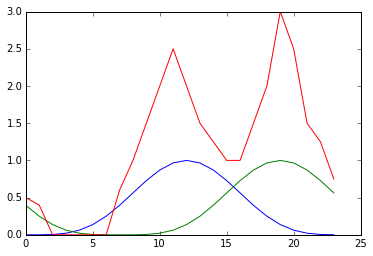

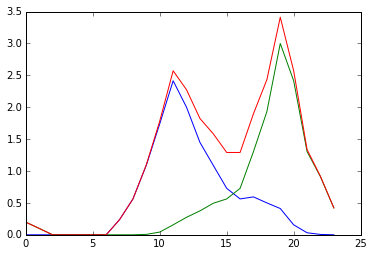

In [4]:
hour = np.arange(0,24)
day, night = np.sin(hour*3.1415/24)**4, np.cos((hour+5)*3.1415/24)**4

plt.plot(day)
plt.plot(night)
ev_demand = np.array([0.5, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 1, 1.5, 2, 2.5, 2, 1.5, 1.25, 1, 1, 1.5, 2, 3, 2.5, 1.5, 1.25, 0.75])
tot = np.sum(ev_demand)
plt.plot(ev_demand)
print(tot) # this is total energy needs to be produced and transmitted to 1 EV 
 
plt.figure()    
plt.plot(ev_demand * day)
plt.plot(ev_demand * night)
plt.plot( ev_demand * (day+night) ) # here is the new demand

print( np.sum (ev_demand * (day+night)))  # NOPE, does not sum up to the original total per vehicle, because there were zeros in ev_demand during night

norm_coeff = tot / np.sum (ev_demand * (day+night)) # renormalize

print( norm_coeff * np.sum (ev_demand * (day+night)))

0.0417484548167


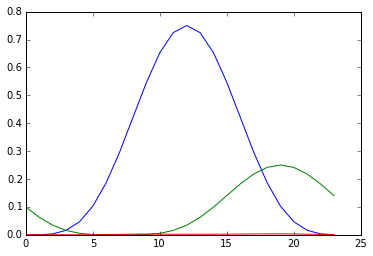

In [69]:
hour = np.arange(0,24)
day, night = .75*np.sin(hour*3.1415/24)**4, .25*np.cos((hour+5)*3.1415/24)**4

plt.plot(day)
plt.plot(night)
ev_demand = EV_sim.group('hour', sum)['kW sum']/2200/1000#np.array([0.5, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 1, 1.5, 2, 2.5, 2, 1.5, 1.25, 1, 1, 1.5, 2, 3, 2.5, 1.5, 1.25, 0.75])
tot = np.sum(ev_demand)
plt.plot(ev_demand)
print(tot) 

0.0170432434089
0.0417484548167


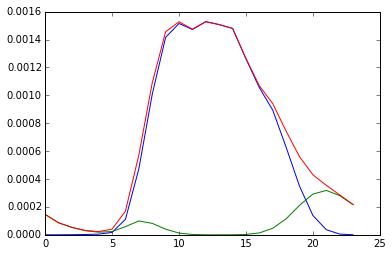

In [43]:
# let's change day vs night proportion
plt.plot(ev_demand * day)
plt.plot(ev_demand * night)
plt.plot( ev_demand * (day+night) ) # here is the new demand

print( np.sum (ev_demand * (day+night)))  # NOPE, does not sum up to the original total per vehicle, because there were zeros in ev_demand during night

norm_coeff = tot / np.sum (ev_demand * (day+night)) # renormalize

print( norm_coeff * np.sum (ev_demand * (day+night)))  # YAY, now it does

0.0170432434089
0.0417484548167


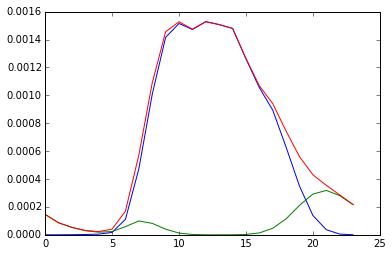

In [44]:
# let's change day vs night proportion
plt.plot(ev_demand * day)
plt.plot(ev_demand * night)
plt.plot( ev_demand * (day+night) ) # here is the new demand

print( np.sum (ev_demand * (day+night)))  # NOPE, does not sum up to the original total per vehicle, because there were zeros in ev_demand during night

norm_coeff = tot / np.sum (ev_demand * (day+night)) # renormalize

print( norm_coeff * np.sum (ev_demand * (day+night))) 

In [45]:
# (EV_sim.group('hour', sum)).plot('hour')

perday_EV = Table()
perday_EV['hour'] = range(1,25)
perday_EV['MW'] = ev_demand * (day+night)*2.5e6
perday_EV
td_new = today_demand.join('OPR_HR', perday_EV, 'hour')
EV_month = Table()
EV_month['hour'] = td_new.sort('INDEX')['OPR_HR']
EV_month['MW'] = td_new.sort('INDEX')['MW_2']

In [73]:
def to_minimize(table, x, y):
    '''  
    x = 'solar MW'
    y= 'wind MW
    '''
    def for_line(b1, b2):
#         estimate = (a * table.column(x) + b)
        return np.average(np.power(b1*table[x] + b2*table[y] -.8*today_demand['MW']-EV_month['MW'] + 15000,2))
    return for_line

    
    


In [47]:
perday_EV

def mean_squared_error(table, x, y):
    def for_line(a, b):
        estimate = (a * table.column(x) + b)
        return np.average((table.column(y) - estimate) ** 2)
    return for_line

hour,MW
1,366.527
2,215.882
3,133.778
4,78.5755
5,58.516
6,100.976
7,423.204
8,1427.86
9,2720.36
10,3638.32


In [74]:
energy2025 = Table()
energy2025['solar MW'] = solar['MW']
energy2025['wind MW'] = wind['MW']
energy2025['demand'] = today_demand['MW']
energy2025['EV'] = EV_month['MW']

energy_min = to_minimize(energy2025, 'solar MW', 'wind MW')
b1, b2 = minimize(energy_min)
b1, b2
# grades_days_mse(a, b) ** 0.5

(1.3773377130913185, 2.3146047826748695)

In [77]:
energy2025

solar MW,wind MW,demand,EV
-20.16,869.011,21697,366.527
-19.7767,1272.17,21126,215.882
-20.6168,549.546,20768,133.778
-22.5268,123.152,20735,78.5755
-23.3954,111.292,20960,58.516
-23.6309,154.555,21984,100.976
149.16,130.55,23752,423.204
1394.7,51.8132,24627,1427.86
3018.49,34.4029,24790,2720.36
4257.4,122.877,25023,3638.32


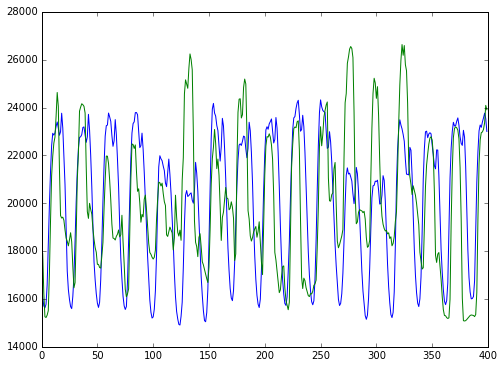

In [75]:
plt.figure(figsize=(8,6))
plt.plot((energy2025['demand']*.75+EV_month['MW'])[0:400])
plt.plot((energy2025['solar MW']*b1+energy2025['wind MW']*b2+15000)[0:400])

In [72]:
# np.sum(((energy2025['demand']*.75+EV_month['MW']) - (energy2025['solar MW']*b1+energy2025['wind MW']*b2+15000))**2)